In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import cv2                   
from tqdm import tqdm
import os   
import os.path
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import random as rn

import dlib
import time
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

Using TensorFlow backend.


In [2]:
X=[]
Y=[]

path = 'HOG2/'

Aishee = path + 'Aishee'
Arkaprabha = path + 'Arkaprabha'
Rohit = path + 'Rohit'
Parnavi = path + 'Parnavi'
Akanksha = path + 'Akanksha'
Sayan = path + 'Sayan'
Sukrita = path + 'Sukrita'
Ritodeep = path + 'Ritodeep'

In [3]:
def assign_label(img,student_name):
    return student_name

def make_train_data(student_name,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,student_name)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,0)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Y.append(str(label))

In [4]:
make_train_data('Aishee',Aishee)

make_train_data('Arkaprabha',Arkaprabha)

make_train_data('Rohit',Rohit)

make_train_data('Parnavi',Parnavi)

make_train_data('Akanksha',Akanksha)

make_train_data('Sayan',Sayan)

make_train_data('Sukrita',Sukrita)

make_train_data('Ritodeep',Ritodeep)

100%|██████████| 87/87 [00:03<00:00, 27.97it/s]


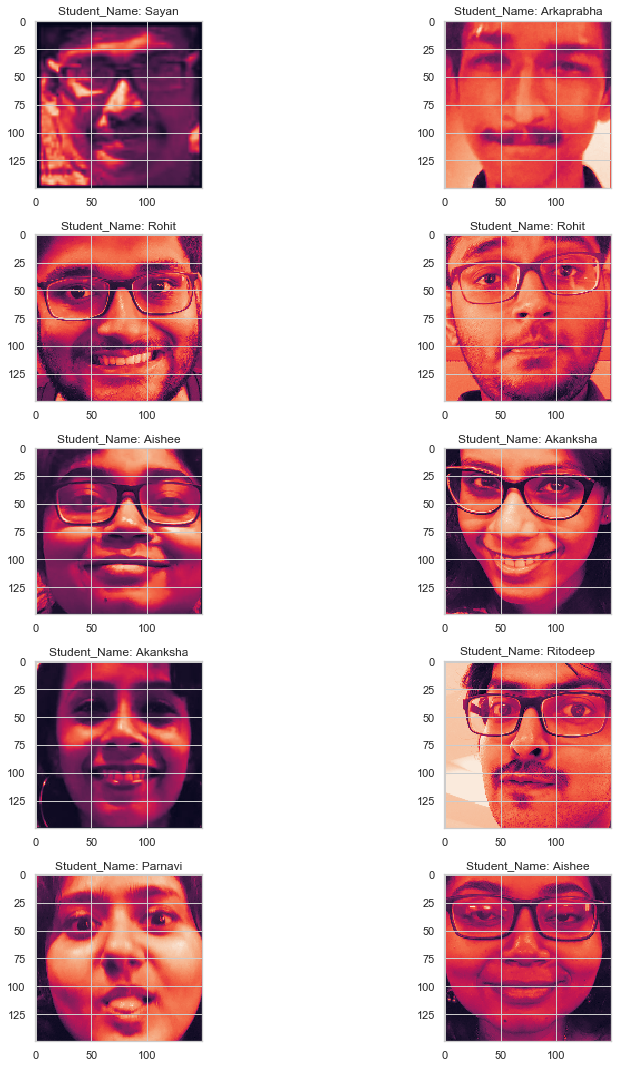

In [5]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Student_Name: '+Y[l])
        
plt.tight_layout()

In [6]:
np.shape(X)

(746, 150, 150)

In [7]:
n,h,w = np.shape(X)

X = np.reshape(X,(n,h*w))

In [8]:
le=LabelEncoder()
Y1=le.fit_transform(Y)
Y1=to_categorical(Y1,8)
X=np.array(X)
X=X/255
# X=X[:,:,:,np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


np.random.seed(42)
rn.seed(42)

In [9]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 2.12792104
Validation score: 0.207547
Iteration 2, loss = 1.77240189
Validation score: 0.528302
Iteration 3, loss = 1.48599605
Validation score: 0.603774
Iteration 4, loss = 1.23730789
Validation score: 0.622642
Iteration 5, loss = 1.02350242
Validation score: 0.641509
Iteration 6, loss = 0.84199690
Validation score: 0.679245
Iteration 7, loss = 0.69307428
Validation score: 0.716981
Iteration 8, loss = 0.57039422
Validation score: 0.716981
Iteration 9, loss = 0.47191362
Validation score: 0.735849
Iteration 10, loss = 0.39137425
Validation score: 0.735849
Iteration 11, loss = 0.32469184
Validation score: 0.735849
Iteration 12, loss = 0.27220868
Validation score: 0.754717
Iteration 13, loss = 0.22845837
Validation score: 0.773585
Iteration 14, loss = 0.19287767
Validation score: 0.773585
Iteration 15, loss = 0.16361266
Validation score: 0.773585
Iteration 16, loss = 0.14052928
Validation score: 0.773585
Iteration 17, loss = 0

In [11]:
y_pred = clf.predict(X_test_pca)

In [12]:
print(y_test)

['Rohit', 'Rohit', 'Arkaprabha', 'Arkaprabha', 'Akanksha', 'Sayan', 'Rohit', 'Arkaprabha', 'Sayan', 'Parnavi', 'Rohit', 'Parnavi', 'Akanksha', 'Akanksha', 'Parnavi', 'Aishee', 'Sukrita', 'Akanksha', 'Arkaprabha', 'Ritodeep', 'Aishee', 'Sukrita', 'Akanksha', 'Ritodeep', 'Ritodeep', 'Parnavi', 'Rohit', 'Sukrita', 'Sukrita', 'Rohit', 'Parnavi', 'Akanksha', 'Parnavi', 'Sayan', 'Aishee', 'Aishee', 'Sayan', 'Parnavi', 'Parnavi', 'Akanksha', 'Aishee', 'Akanksha', 'Sukrita', 'Aishee', 'Sayan', 'Aishee', 'Akanksha', 'Parnavi', 'Aishee', 'Sayan', 'Sayan', 'Parnavi', 'Akanksha', 'Arkaprabha', 'Rohit', 'Rohit', 'Arkaprabha', 'Aishee', 'Arkaprabha', 'Sukrita', 'Ritodeep', 'Rohit', 'Rohit', 'Sukrita', 'Akanksha', 'Aishee', 'Akanksha', 'Parnavi', 'Akanksha', 'Sukrita', 'Ritodeep', 'Ritodeep', 'Rohit', 'Parnavi', 'Sayan', 'Aishee', 'Rohit', 'Ritodeep', 'Akanksha', 'Aishee', 'Sukrita', 'Parnavi', 'Aishee', 'Parnavi', 'Arkaprabha', 'Ritodeep', 'Sukrita', 'Parnavi', 'Sayan', 'Aishee', 'Rohit', 'Ritodeep'

In [13]:
c = 0

# pred_digits = np.argmax(y_pred,axis=1)

for i in range(0,len(y_pred)):
    if y_test[i] == y_pred[i]:
#     if(np.argmax(y_test[i])==pred_digits[i]):
        c += 1
        
a = c/len(y_pred)

print(a)

0.8035714285714286


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Aishee       1.00      0.78      0.88        37
    Akanksha       0.84      0.79      0.82        34
  Arkaprabha       0.81      0.88      0.84        24
     Parnavi       0.76      0.76      0.76        33
    Ritodeep       0.86      0.82      0.84        22
       Rohit       0.65      0.71      0.68        28
       Sayan       0.72      0.91      0.81        23
     Sukrita       0.83      0.83      0.83        23

   micro avg       0.80      0.80      0.80       224
   macro avg       0.81      0.81      0.81       224
weighted avg       0.82      0.80      0.81       224



In [15]:
# if(np.argmax(y_test[i])==pred_digits[i]):

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
#     if(np.argmax(y_test[i])==pred_digits[i]):
    if y_test[i] == y_pred[i]:
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
#     if(not np.argmax(y_test[i])==pred_digits[i]):
    if not y_test[i] == y_pred[i]:
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [16]:
n_test,h_test = np.shape(X_test)

X_test = np.reshape(X_test,(n_test,h,w))

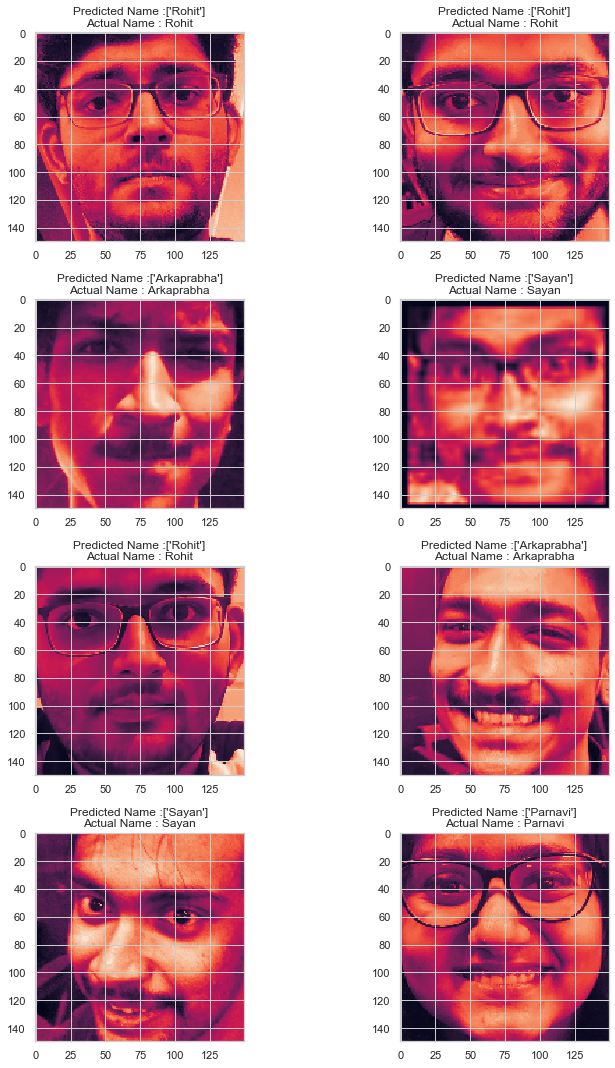

In [17]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Name :"+str([y_pred[prop_class[count]]])+"\n"+"Actual Name : "+str(y_test[prop_class[count]]))
        plt.tight_layout()
        count+=1

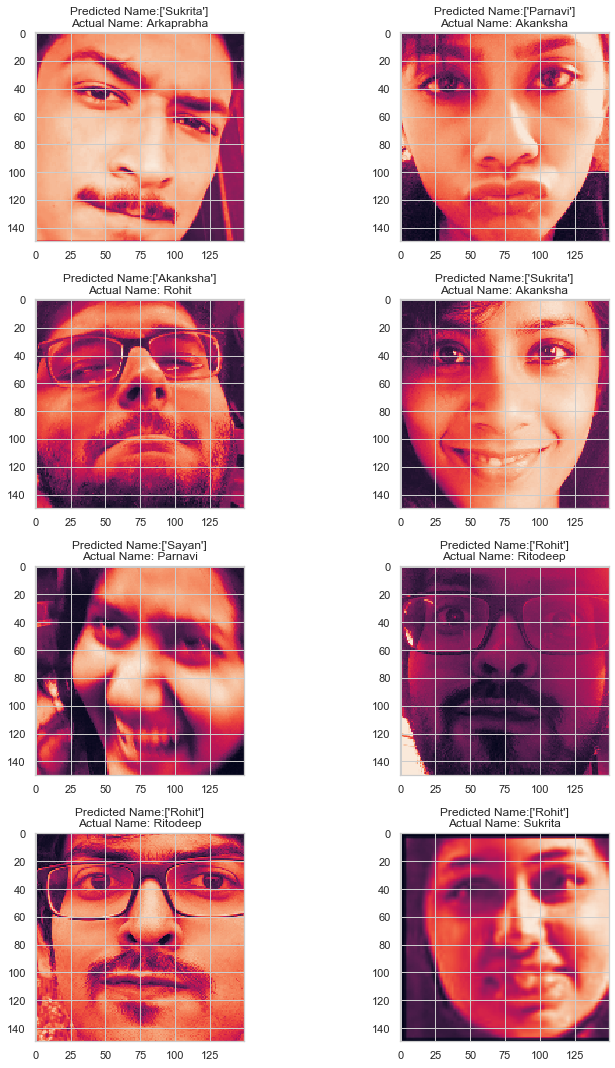

In [18]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Name:"+str([y_pred[mis_class[count]]])+"\n"+"Actual Name: "+str(y_test[mis_class[count]]))
        plt.tight_layout()
        count+=1

In [19]:
# batch_size=128
# epochs=20

# hist = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_val,y_val),
#                               verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [20]:
# # model.save('gray1.h5')
# plt.figure(1)
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['train', 'validation'])
# # plt.ylim([0.0,2.5])

# plt.figure(2)
# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['train', 'validation'])
# # plt.ylim([0.0,1.0])

In [21]:
# pred=model.predict(x_test)
# pred_digits=np.argmax(pred,axis=1)

# loss_t,accuracy_t=model.evaluate(x_test,y_test)

# print(accuracy_t)

In [22]:
# # now storing some properly as well as misclassified indexes'.
# i=0
# prop_class=[]
# mis_class=[]

# for i in range(len(y_test)):
#     if(np.argmax(y_test[i])==pred_digits[i]):
#         prop_class.append(i)
#     if(len(prop_class)==8):
#         break

# i=0
# for i in range(len(y_test)):
#     if(not np.argmax(y_test[i])==pred_digits[i]):
#         mis_class.append(i)
#     if(len(mis_class)==8):
#         break

In [23]:
# y_test.shape

In [24]:
# warnings.filterwarnings('always')
# warnings.filterwarnings('ignore')

# count=0
# fig,ax=plt.subplots(4,2)
# fig.set_size_inches(15,15)
# for i in range (4):
#     for j in range (2):
#         ax[i,j].imshow(x_test[prop_class[count]])
#         ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
#         plt.tight_layout()
#         count+=1

In [25]:
# warnings.filterwarnings('always')
# warnings.filterwarnings('ignore')

# count=0
# fig,ax=plt.subplots(4,2)
# fig.set_size_inches(15,15)
# for i in range (4):
#     for j in range (2):
#         ax[i,j].imshow(x_test[mis_class[count]])
#         ax[i,j].set_title("Predicted Name: "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Name: "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
#         plt.tight_layout()
#         count+=1